In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 0], [1, 0, 1, 1], [1, 0, 0, 1], [0, 1, 0, 1], [0, 0, 1, 0], [1, 0, 1, 0], [0, 1, 1, 0], [0, 0, 0, 0]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49709 stdev: 0.04840
Best fitness: 0.66234 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.123
Mean genetic distance 2.881, standard deviation 0.443
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 8.229 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51492 stdev: 0.05149
Best fitness: 0.66234 - size: (2, 13) - species 2 - id 92
Average adjusted fitness: 0.148
Mean genetic distance 2.993, standard deviation 0.436
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.994 sec (9.612 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53234 stdev: 0.04808
Best fitness: 0.66234 - size: (2, 13) - species 16 - id 92
Average adjusted fitness: 0.140
Mean genetic distance 3.058, standard deviation 0.453
Population of 197 members in 32 species
Total extinction

Population's average fitness: 0.61026 stdev: 0.08342
Best fitness: 0.77737 - size: (5, 19) - species 13 - id 2816
Average adjusted fitness: 0.151
Mean genetic distance 3.234, standard deviation 0.482
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.024 sec (20.259 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60677 stdev: 0.08719
Best fitness: 0.77737 - size: (5, 19) - species 13 - id 2816
Average adjusted fitness: 0.224
Mean genetic distance 3.235, standard deviation 0.492
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 19.552 sec (20.363 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60891 stdev: 0.08442
Best fitness: 0.77737 - size: (5, 19) - species 13 - id 2816
Average adjusted fitness: 0.161
Mean genetic distance 3.245, standard deviation 0.492
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 21.972 sec (20.580 average)

 

Population's average fitness: 0.61540 stdev: 0.10278
Best fitness: 0.80087 - size: (15, 35) - species 14 - id 5592
Average adjusted fitness: 0.260
Mean genetic distance 3.206, standard deviation 0.546
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.476 sec (22.848 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.62156 stdev: 0.09668
Best fitness: 0.81014 - size: (14, 35) - species 14 - id 7058
Average adjusted fitness: 0.239
Mean genetic distance 3.213, standard deviation 0.532
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 21.880 sec (22.563 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61229 stdev: 0.09796
Best fitness: 0.81014 - size: (14, 35) - species 14 - id 7058
Average adjusted fitness: 0.205
Mean genetic distance 3.236, standard deviation 0.548
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 21.388 sec (22.533 average)

Population's average fitness: 0.60963 stdev: 0.09421
Best fitness: 0.81014 - size: (14, 35) - species 14 - id 7058
Average adjusted fitness: 0.184
Mean genetic distance 3.154, standard deviation 0.570
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 24.558 sec (23.947 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.61332 stdev: 0.09525
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.207
Mean genetic distance 3.147, standard deviation 0.551
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 25.097 sec (24.189 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.61903 stdev: 0.09265
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.206
Mean genetic distance 3.159, standard deviation 0.556
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 25.004 sec (24.412 averag

Population's average fitness: 0.63333 stdev: 0.10546
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.314
Mean genetic distance 3.149, standard deviation 0.608
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 25.050 sec (26.892 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.62857 stdev: 0.10765
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.326
Mean genetic distance 3.158, standard deviation 0.590
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 26.256 sec (27.034 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63381 stdev: 0.10342
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.254
Mean genetic distance 3.123, standard deviation 0.592
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 24.845 sec (27.002 avera

Population's average fitness: 0.61633 stdev: 0.10661
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.215
Mean genetic distance 3.197, standard deviation 0.611
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 28.370 sec (28.852 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.62821 stdev: 0.09903
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.248
Mean genetic distance 3.194, standard deviation 0.611
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 29.444 sec (29.037 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63167 stdev: 0.10246
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.202
Mean genetic distance 3.159, standard deviation 0.599
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 29.229 sec (29.158 ave

Population's average fitness: 0.63418 stdev: 0.10754
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.259
Mean genetic distance 3.154, standard deviation 0.550
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.644 sec (32.060 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.63210 stdev: 0.10637
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.247
Mean genetic distance 3.158, standard deviation 0.542
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 33.907 sec (32.504 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.63453 stdev: 0.11083
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.298
Mean genetic distance 3.135, standard deviation 0.546
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 36.067 sec (33.051 ave

Population's average fitness: 0.64489 stdev: 0.10798
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.198
Mean genetic distance 3.173, standard deviation 0.555
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 38.730 sec (36.087 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.65075 stdev: 0.10484
Best fitness: 0.81880 - size: (14, 35) - species 14 - id 11124
Average adjusted fitness: 0.183
Mean genetic distance 3.130, standard deviation 0.538
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 37.963 sec (36.399 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.63294 stdev: 0.10915
Best fitness: 0.81880 - size: (29, 71) - species 81 - id 27753
Average adjusted fitness: 0.162
Mean genetic distance 3.144, standard deviation 0.539
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 36.542 sec (36.256 ave

Population's average fitness: 0.64503 stdev: 0.10531
Best fitness: 0.82931 - size: (35, 76) - species 77 - id 29338
Average adjusted fitness: 0.273
Mean genetic distance 3.119, standard deviation 0.590
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.081 sec (35.624 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.64668 stdev: 0.10217
Best fitness: 0.82931 - size: (35, 76) - species 77 - id 29338
Average adjusted fitness: 0.172
Mean genetic distance 3.111, standard deviation 0.601
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 36.182 sec (35.771 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.63586 stdev: 0.11080
Best fitness: 0.82931 - size: (35, 76) - species 77 - id 29338
Average adjusted fitness: 0.179
Mean genetic distance 3.100, standard deviation 0.610
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 36.146 sec (36.005 ave

Population's average fitness: 0.66094 stdev: 0.10917
Best fitness: 0.83055 - size: (36, 77) - species 77 - id 32724
Average adjusted fitness: 0.182
Mean genetic distance 2.984, standard deviation 0.516
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 47.830 sec (47.840 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.66258 stdev: 0.10575
Best fitness: 0.83055 - size: (36, 77) - species 77 - id 32724
Average adjusted fitness: 0.186
Mean genetic distance 2.973, standard deviation 0.517
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 51.825 sec (48.265 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.64996 stdev: 0.11264
Best fitness: 0.83055 - size: (36, 77) - species 77 - id 32724
Average adjusted fitness: 0.336
Mean genetic distance 2.979, standard deviation 0.526
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 48.040 sec (48.394 ave

Population's average fitness: 0.65239 stdev: 0.10957
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.309
Mean genetic distance 2.920, standard deviation 0.484
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 52.084 sec (48.047 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.66576 stdev: 0.10624
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.236
Mean genetic distance 2.910, standard deviation 0.491
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 55.025 sec (48.765 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.65586 stdev: 0.11002
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.243
Mean genetic distance 2.906, standard deviation 0.476
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 54.481 sec (49.408 ave

Population's average fitness: 0.65206 stdev: 0.10792
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.200
Mean genetic distance 2.905, standard deviation 0.556
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 42.550 sec (44.654 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.64507 stdev: 0.11199
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.220
Mean genetic distance 2.946, standard deviation 0.510
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 43.147 sec (44.364 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.65387 stdev: 0.10593
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.179
Mean genetic distance 2.948, standard deviation 0.508
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 46.036 sec (44.581 aver

Population's average fitness: 0.65482 stdev: 0.11118
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.315
Mean genetic distance 2.954, standard deviation 0.477
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 46.543 sec (46.182 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.66259 stdev: 0.11051
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.202
Mean genetic distance 2.971, standard deviation 0.489
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 45.803 sec (46.277 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.65353 stdev: 0.10934
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.212
Mean genetic distance 2.962, standard deviation 0.512
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 45.779 sec (46.174 ave

Population's average fitness: 0.65443 stdev: 0.11107
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.261
Mean genetic distance 2.920, standard deviation 0.495
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 50.288 sec (49.093 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.65150 stdev: 0.10904
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.201
Mean genetic distance 2.910, standard deviation 0.504
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 51.480 sec (49.412 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.64436 stdev: 0.11007
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.246
Mean genetic distance 2.916, standard deviation 0.491
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 54.266 sec (50.081 ave

Population's average fitness: 0.64847 stdev: 0.10871
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.320
Mean genetic distance 2.911, standard deviation 0.468
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 55.189 sec (54.715 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.66292 stdev: 0.10891
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.233
Mean genetic distance 2.930, standard deviation 0.475
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 55.261 sec (54.812 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.65736 stdev: 0.10744
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.251
Mean genetic distance 2.929, standard deviation 0.473
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 55.474 sec (54.580 ave

Population's average fitness: 0.65019 stdev: 0.10867
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.176
Mean genetic distance 2.905, standard deviation 0.543
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 55.808 sec (54.558 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.65806 stdev: 0.10841
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.159
Mean genetic distance 2.906, standard deviation 0.542
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 58.516 sec (55.083 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.65854 stdev: 0.11084
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.235
Mean genetic distance 2.899, standard deviation 0.544
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 57.592 sec (55.478 ave

Population's average fitness: 0.65253 stdev: 0.10696
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.196
Mean genetic distance 2.763, standard deviation 0.583
Population of 200 members in 6 species
Total extinctions: 0
Generation time: 50.501 sec (58.272 average)

 ****** Running generation 385 ****** 

Population's average fitness: 0.65220 stdev: 0.09983
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.159
Mean genetic distance 2.756, standard deviation 0.592
Population of 200 members in 5 species
Total extinctions: 0
Generation time: 51.165 sec (58.110 average)

 ****** Running generation 386 ****** 

Population's average fitness: 0.62686 stdev: 0.11138
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.283
Mean genetic distance 2.746, standard deviation 0.573
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 52.134 sec (57.367 averag

Population's average fitness: 0.64787 stdev: 0.11479
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.209
Mean genetic distance 2.897, standard deviation 0.518
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 57.506 sec (57.387 average)

 ****** Running generation 409 ****** 

Population's average fitness: 0.65545 stdev: 0.11249
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.210
Mean genetic distance 2.890, standard deviation 0.527
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 54.815 sec (57.382 average)

 ****** Running generation 410 ****** 

Population's average fitness: 0.65688 stdev: 0.11325
Best fitness: 0.83859 - size: (37, 79) - species 77 - id 36967
Average adjusted fitness: 0.275
Mean genetic distance 2.873, standard deviation 0.548
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 52.499 sec (57.168 ave

Population's average fitness: 0.65248 stdev: 0.11250
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.204
Mean genetic distance 3.005, standard deviation 0.546
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 69.379 sec (63.550 average)

 ****** Running generation 433 ****** 

Population's average fitness: 0.63209 stdev: 0.11560
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.339
Mean genetic distance 3.015, standard deviation 0.527
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 65.243 sec (63.847 average)

 ****** Running generation 434 ****** 

Population's average fitness: 0.64593 stdev: 0.11240
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.299
Mean genetic distance 3.008, standard deviation 0.533
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 68.025 sec (64.556 ave

Population's average fitness: 0.66665 stdev: 0.11644
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.219
Mean genetic distance 3.014, standard deviation 0.519
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 64.941 sec (67.265 average)

 ****** Running generation 457 ****** 

Population's average fitness: 0.65635 stdev: 0.10999
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.167
Mean genetic distance 2.993, standard deviation 0.548
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 65.219 sec (67.134 average)

 ****** Running generation 458 ****** 

Population's average fitness: 0.65058 stdev: 0.11414
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.288
Mean genetic distance 2.990, standard deviation 0.547
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 70.107 sec (67.464 ave

Population's average fitness: 0.64690 stdev: 0.11623
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.338
Mean genetic distance 2.935, standard deviation 0.553
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 68.936 sec (72.378 average)

 ****** Running generation 481 ****** 

Population's average fitness: 0.65149 stdev: 0.11435
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.188
Mean genetic distance 2.931, standard deviation 0.523
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 68.173 sec (71.812 average)

 ****** Running generation 482 ****** 

Population's average fitness: 0.65316 stdev: 0.11244
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.185
Mean genetic distance 2.921, standard deviation 0.538
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 69.152 sec (71.575 aver

Population's average fitness: 0.65807 stdev: 0.11095
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.235
Mean genetic distance 2.921, standard deviation 0.522
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 63.859 sec (66.721 average)

 ****** Running generation 505 ****** 

Population's average fitness: 0.65277 stdev: 0.11285
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.257
Mean genetic distance 2.931, standard deviation 0.553
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 68.687 sec (66.506 average)

 ****** Running generation 506 ****** 

Population's average fitness: 0.64966 stdev: 0.11520
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.249
Mean genetic distance 2.947, standard deviation 0.548
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 68.019 sec (66.103 ave

Population's average fitness: 0.64869 stdev: 0.10943
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.195
Mean genetic distance 2.921, standard deviation 0.573
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 66.023 sec (72.676 average)

 ****** Running generation 529 ****** 

Population's average fitness: 0.65532 stdev: 0.10784
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.219
Mean genetic distance 2.922, standard deviation 0.539
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 66.559 sec (71.721 average)

 ****** Running generation 530 ****** 

Population's average fitness: 0.65064 stdev: 0.11127
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.159
Mean genetic distance 2.930, standard deviation 0.551
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 70.020 sec (71.775 aver

Population's average fitness: 0.63135 stdev: 0.11537
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.302
Mean genetic distance 2.920, standard deviation 0.538
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 64.745 sec (67.047 average)

 ****** Running generation 553 ****** 

Population's average fitness: 0.64002 stdev: 0.11696
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.248
Mean genetic distance 2.913, standard deviation 0.571
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 77.251 sec (68.594 average)

 ****** Running generation 554 ****** 

Population's average fitness: 0.65951 stdev: 0.11351
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.172
Mean genetic distance 2.928, standard deviation 0.600
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 66.872 sec (68.766 aver

Population's average fitness: 0.65744 stdev: 0.11722
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.285
Mean genetic distance 2.936, standard deviation 0.510
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 61.940 sec (61.794 average)

 ****** Running generation 577 ****** 

Population's average fitness: 0.66636 stdev: 0.11618
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.285
Mean genetic distance 2.934, standard deviation 0.501
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 60.838 sec (61.090 average)

 ****** Running generation 578 ****** 

Population's average fitness: 0.66062 stdev: 0.11860
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.368
Mean genetic distance 2.939, standard deviation 0.491
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 60.185 sec (60.433 ave

Population's average fitness: 0.66069 stdev: 0.12001
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.190
Mean genetic distance 2.889, standard deviation 0.529
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 64.938 sec (64.339 average)

 ****** Running generation 601 ****** 

Population's average fitness: 0.66552 stdev: 0.11227
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.213
Mean genetic distance 2.893, standard deviation 0.546
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 68.948 sec (64.938 average)

 ****** Running generation 602 ****** 

Population's average fitness: 0.66585 stdev: 0.12072
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.316
Mean genetic distance 2.834, standard deviation 0.504
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 65.945 sec (65.130 ave

Population's average fitness: 0.64514 stdev: 0.11200
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.208
Mean genetic distance 2.724, standard deviation 0.427
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 57.206 sec (58.790 average)

 ****** Running generation 625 ****** 

Population's average fitness: 0.65661 stdev: 0.11198
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.191
Mean genetic distance 2.724, standard deviation 0.421
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 59.885 sec (58.502 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.65557 stdev: 0.11326
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.186
Mean genetic distance 2.714, standard deviation 0.445
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 58.042 sec (58.195 averag

Population's average fitness: 0.66500 stdev: 0.11447
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.223
Mean genetic distance 2.866, standard deviation 0.455
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 63.349 sec (63.024 average)

 ****** Running generation 649 ****** 

Population's average fitness: 0.67256 stdev: 0.11238
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.180
Mean genetic distance 2.865, standard deviation 0.448
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 61.457 sec (62.959 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.65997 stdev: 0.11749
Best fitness: 0.84168 - size: (38, 79) - species 77 - id 72159
Average adjusted fitness: 0.168
Mean genetic distance 2.853, standard deviation 0.464
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 64.088 sec (63.177 ave

Population's average fitness: 0.64498 stdev: 0.11301
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.139
Mean genetic distance 2.719, standard deviation 0.427
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 54.102 sec (56.634 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.65510 stdev: 0.10914
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.207
Mean genetic distance 2.763, standard deviation 0.399
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 59.520 sec (56.821 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.65569 stdev: 0.11872
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.152
Mean genetic distance 2.755, standard deviation 0.408
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 61.808 sec (57.083 a

Population's average fitness: 0.64435 stdev: 0.11564
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.145
Mean genetic distance 2.758, standard deviation 0.403
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 62.672 sec (64.664 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.65072 stdev: 0.11754
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.164
Mean genetic distance 2.669, standard deviation 0.430
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 65.618 sec (64.676 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.66103 stdev: 0.11632
Best fitness: 0.84477 - size: (39, 80) - species 77 - id 115543
Average adjusted fitness: 0.165
Mean genetic distance 2.688, standard deviation 0.431
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 67.288 sec (65.004 av

Population's average fitness: 0.64737 stdev: 0.12378
Best fitness: 0.84477 - size: (52, 110) - species 228 - id 124610
Average adjusted fitness: 0.225
Mean genetic distance 2.670, standard deviation 0.396
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 71.153 sec (63.506 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.66371 stdev: 0.11124
Best fitness: 0.84477 - size: (52, 110) - species 228 - id 124610
Average adjusted fitness: 0.177
Mean genetic distance 2.663, standard deviation 0.386
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 72.555 sec (64.539 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.65100 stdev: 0.11206
Best fitness: 0.84477 - size: (52, 110) - species 228 - id 124610
Average adjusted fitness: 0.151
Mean genetic distance 2.670, standard deviation 0.404
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 76.366 sec (65.9

Mean genetic distance 2.699, standard deviation 0.413
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 79.534 sec (80.708 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.66259 stdev: 0.11587
Best fitness: 0.84477 - size: (52, 110) - species 228 - id 124610
Average adjusted fitness: 0.191
Mean genetic distance 2.700, standard deviation 0.414
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 82.179 sec (80.330 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.67063 stdev: 0.11789
Best fitness: 0.84477 - size: (52, 110) - species 228 - id 124610
Average adjusted fitness: 0.178
Mean genetic distance 2.707, standard deviation 0.428
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 83.025 sec (80.701 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.66148 stdev: 0.11931
Best fitness: 0.84477 - size: (52, 110) - 

Mean genetic distance 3.109, standard deviation 0.485
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 23.853 sec (21.488 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61819 stdev: 0.08556
Best fitness: 0.80025 - size: (5, 19) - species 7 - id 2292
Average adjusted fitness: 0.182
Mean genetic distance 3.101, standard deviation 0.496
Population of 189 members in 35 species
Total extinctions: 0
Generation time: 24.336 sec (22.023 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62469 stdev: 0.08504
Best fitness: 0.80025 - size: (5, 19) - species 7 - id 2292
Average adjusted fitness: 0.162
Mean genetic distance 3.096, standard deviation 0.509
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 24.514 sec (22.389 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62362 stdev: 0.08584
Best fitness: 0.80025 - size: (5, 19) - species 7 - id 22

Mean genetic distance 3.280, standard deviation 0.532
Population of 206 members in 25 species
Total extinctions: 0
Generation time: 24.261 sec (26.841 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.64201 stdev: 0.08997
Best fitness: 0.80643 - size: (6, 19) - species 7 - id 4155
Average adjusted fitness: 0.234
Mean genetic distance 3.313, standard deviation 0.520
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 26.831 sec (26.529 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.64637 stdev: 0.08858
Best fitness: 0.81262 - size: (7, 21) - species 7 - id 6230
Average adjusted fitness: 0.238
Mean genetic distance 3.313, standard deviation 0.524
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 25.346 sec (26.215 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.64704 stdev: 0.09799
Best fitness: 0.81262 - size: (7, 21) - species 7 - id 62

Mean genetic distance 3.386, standard deviation 0.566
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 25.939 sec (26.238 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.63293 stdev: 0.09354
Best fitness: 0.81262 - size: (7, 21) - species 7 - id 6230
Average adjusted fitness: 0.226
Mean genetic distance 3.400, standard deviation 0.592
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 26.781 sec (26.290 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.62267 stdev: 0.09000
Best fitness: 0.81262 - size: (7, 21) - species 7 - id 6230
Average adjusted fitness: 0.181
Mean genetic distance 3.396, standard deviation 0.629
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 27.885 sec (26.381 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.62102 stdev: 0.09458
Best fitness: 0.81262 - size: (7, 21) - species 7 - id 62

Mean genetic distance 3.383, standard deviation 0.607
Population of 195 members in 22 species
Total extinctions: 0
Generation time: 31.932 sec (30.387 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.62974 stdev: 0.09559
Best fitness: 0.81509 - size: (10, 28) - species 7 - id 13020
Average adjusted fitness: 0.189
Mean genetic distance 3.387, standard deviation 0.603
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 28.664 sec (30.035 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.63508 stdev: 0.09326
Best fitness: 0.81571 - size: (11, 31) - species 48 - id 13969
Average adjusted fitness: 0.260
Mean genetic distance 3.381, standard deviation 0.603
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 32.214 sec (30.221 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.63199 stdev: 0.09811
Best fitness: 0.81571 - size: (11, 31) - species 48 

Population's average fitness: 0.63639 stdev: 0.10529
Best fitness: 0.82189 - size: (12, 30) - species 66 - id 15765
Average adjusted fitness: 0.283
Mean genetic distance 3.263, standard deviation 0.580
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 35.983 sec (35.497 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.63417 stdev: 0.10511
Best fitness: 0.82189 - size: (12, 30) - species 66 - id 15765
Average adjusted fitness: 0.283
Mean genetic distance 3.254, standard deviation 0.585
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 34.072 sec (35.394 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.64014 stdev: 0.10364
Best fitness: 0.82189 - size: (12, 30) - species 66 - id 15765
Average adjusted fitness: 0.186
Mean genetic distance 3.215, standard deviation 0.586
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 33.143 sec (35.164 ave

Population's average fitness: 0.66127 stdev: 0.11442
Best fitness: 0.82684 - size: (12, 31) - species 66 - id 20312
Average adjusted fitness: 0.260
Mean genetic distance 3.275, standard deviation 0.621
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 37.494 sec (38.656 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.66027 stdev: 0.11118
Best fitness: 0.82684 - size: (12, 31) - species 66 - id 20312
Average adjusted fitness: 0.354
Mean genetic distance 3.265, standard deviation 0.616
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 37.854 sec (38.253 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66471 stdev: 0.10943
Best fitness: 0.82684 - size: (12, 31) - species 66 - id 20312
Average adjusted fitness: 0.253
Mean genetic distance 3.269, standard deviation 0.603
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 37.252 sec (38.224 ave

Population's average fitness: 0.66194 stdev: 0.11045
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.384
Mean genetic distance 3.182, standard deviation 0.651
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 36.286 sec (38.214 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.65695 stdev: 0.11183
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.239
Mean genetic distance 3.175, standard deviation 0.626
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 35.238 sec (37.083 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.65074 stdev: 0.11107
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.201
Mean genetic distance 3.168, standard deviation 0.612
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 38.026 sec (37.095 ave

Population's average fitness: 0.65632 stdev: 0.10966
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.217
Mean genetic distance 3.020, standard deviation 0.528
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 37.967 sec (38.835 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.67101 stdev: 0.11106
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.269
Mean genetic distance 3.011, standard deviation 0.515
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 38.267 sec (38.973 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.65757 stdev: 0.11181
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.229
Mean genetic distance 3.017, standard deviation 0.520
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 40.303 sec (39.285 ave

Population's average fitness: 0.66193 stdev: 0.10924
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.225
Mean genetic distance 2.880, standard deviation 0.527
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 43.807 sec (40.598 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.65554 stdev: 0.10456
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.203
Mean genetic distance 2.867, standard deviation 0.534
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 42.651 sec (40.983 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.63968 stdev: 0.11306
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.279
Mean genetic distance 2.825, standard deviation 0.560
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 43.788 sec (41.474 ave

Population's average fitness: 0.65541 stdev: 0.11527
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.302
Mean genetic distance 3.004, standard deviation 0.612
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 49.765 sec (49.923 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.64895 stdev: 0.11491
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.297
Mean genetic distance 2.883, standard deviation 0.619
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 50.972 sec (50.110 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.65351 stdev: 0.10658
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.324
Mean genetic distance 2.867, standard deviation 0.581
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 51.710 sec (50.315 ave

Population's average fitness: 0.65096 stdev: 0.11526
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.304
Mean genetic distance 2.746, standard deviation 0.448
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 45.996 sec (48.070 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.65609 stdev: 0.11590
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.234
Mean genetic distance 2.757, standard deviation 0.447
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 47.887 sec (47.853 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.64823 stdev: 0.11755
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.270
Mean genetic distance 2.760, standard deviation 0.453
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 50.041 sec (47.956 ave

Population's average fitness: 0.65579 stdev: 0.11069
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.242
Mean genetic distance 2.816, standard deviation 0.515
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 38.349 sec (42.651 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.66459 stdev: 0.11188
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.294
Mean genetic distance 2.794, standard deviation 0.540
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 38.752 sec (41.896 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.64787 stdev: 0.11469
Best fitness: 0.82870 - size: (12, 32) - species 66 - id 24026
Average adjusted fitness: 0.380
Mean genetic distance 2.823, standard deviation 0.539
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 38.541 sec (41.005 ave

Population's average fitness: 0.65974 stdev: 0.11837
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.243
Mean genetic distance 2.917, standard deviation 0.549
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.469 sec (40.596 average)

 ****** Running generation 306 ****** 

Population's average fitness: 0.66526 stdev: 0.11133
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.176
Mean genetic distance 2.892, standard deviation 0.571
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 39.219 sec (40.410 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.64427 stdev: 0.11375
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.205
Mean genetic distance 2.915, standard deviation 0.573
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 40.149 sec (40.445 ave

Population's average fitness: 0.65782 stdev: 0.11411
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.200
Mean genetic distance 2.730, standard deviation 0.563
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 35.324 sec (36.224 average)

 ****** Running generation 330 ****** 

Population's average fitness: 0.66165 stdev: 0.11452
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.396
Mean genetic distance 2.750, standard deviation 0.546
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 34.803 sec (36.114 average)

 ****** Running generation 331 ****** 

Population's average fitness: 0.64411 stdev: 0.12107
Best fitness: 0.83117 - size: (13, 35) - species 66 - id 49229
Average adjusted fitness: 0.262
Mean genetic distance 2.785, standard deviation 0.522
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 34.059 sec (35.929 averag

Population's average fitness: 0.66765 stdev: 0.10629
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.169
Mean genetic distance 2.790, standard deviation 0.465
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 32.753 sec (32.067 average)

 ****** Running generation 354 ****** 

Population's average fitness: 0.65864 stdev: 0.11342
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.232
Mean genetic distance 2.770, standard deviation 0.475
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 33.063 sec (32.163 average)

 ****** Running generation 355 ****** 

Population's average fitness: 0.65828 stdev: 0.11069
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.232
Mean genetic distance 2.746, standard deviation 0.488
Population of 195 members in 12 species
Total extinctions: 0
Generation time: 34.037 sec (32.374 

Mean genetic distance 2.791, standard deviation 0.451
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 33.561 sec (32.874 average)

 ****** Running generation 377 ****** 

Population's average fitness: 0.66105 stdev: 0.11735
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.329
Mean genetic distance 2.818, standard deviation 0.449
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 34.006 sec (33.040 average)

 ****** Running generation 378 ****** 

Population's average fitness: 0.67157 stdev: 0.10956
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.268
Mean genetic distance 2.840, standard deviation 0.461
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 35.481 sec (33.382 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.66386 stdev: 0.11063
Best fitness: 0.83302 - size: (15, 38) - speci

Population's average fitness: 0.66859 stdev: 0.11325
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.319
Mean genetic distance 2.933, standard deviation 0.523
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 34.011 sec (34.977 average)

 ****** Running generation 401 ****** 

Population's average fitness: 0.67865 stdev: 0.10739
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.225
Mean genetic distance 2.934, standard deviation 0.515
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 34.357 sec (34.958 average)

 ****** Running generation 402 ****** 

Population's average fitness: 0.66785 stdev: 0.11298
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.256
Mean genetic distance 2.927, standard deviation 0.530
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 34.632 sec (34.983 

Mean genetic distance 2.835, standard deviation 0.540
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 34.454 sec (35.200 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.66359 stdev: 0.11885
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.238
Mean genetic distance 2.854, standard deviation 0.538
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 35.173 sec (35.127 average)

 ****** Running generation 425 ****** 

Population's average fitness: 0.66643 stdev: 0.10920
Best fitness: 0.83302 - size: (15, 38) - species 156 - id 56420
Average adjusted fitness: 0.198
Mean genetic distance 2.857, standard deviation 0.522
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.369 sec (35.031 average)

 ****** Running generation 426 ****** 

Population's average fitness: 0.66272 stdev: 0.11885
Best fitness: 0.83302 - size: (15, 38) - speci

Population's average fitness: 0.66254 stdev: 0.11293
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.206
Mean genetic distance 2.707, standard deviation 0.495
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 33.595 sec (38.845 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.66021 stdev: 0.11333
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.302
Mean genetic distance 2.707, standard deviation 0.509
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 33.673 sec (38.286 average)

 ****** Running generation 449 ****** 

Population's average fitness: 0.65237 stdev: 0.10867
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.232
Mean genetic distance 2.701, standard deviation 0.531
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 34.915 sec (37.261 averag

Population's average fitness: 0.66251 stdev: 0.11088
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.333
Mean genetic distance 2.559, standard deviation 0.473
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 39.994 sec (41.626 average)

 ****** Running generation 472 ****** 

Population's average fitness: 0.64555 stdev: 0.11176
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.205
Mean genetic distance 2.580, standard deviation 0.458
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 38.255 sec (41.328 average)

 ****** Running generation 473 ****** 

Population's average fitness: 0.65485 stdev: 0.11017
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.211
Mean genetic distance 2.587, standard deviation 0.447
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 38.040 sec (41.163 averag

Population's average fitness: 0.66434 stdev: 0.11668
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.279
Mean genetic distance 2.901, standard deviation 0.473
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 29.171 sec (30.883 average)

 ****** Running generation 496 ****** 

Population's average fitness: 0.67012 stdev: 0.11559
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.244
Mean genetic distance 2.926, standard deviation 0.462
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 29.236 sec (30.704 average)

 ****** Running generation 497 ****** 

Population's average fitness: 0.67330 stdev: 0.11247
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.224
Mean genetic distance 2.947, standard deviation 0.464
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 33.839 sec (30.902 ave

Population's average fitness: 0.67837 stdev: 0.11641
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.269
Mean genetic distance 2.934, standard deviation 0.552
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 33.005 sec (31.676 average)

 ****** Running generation 520 ****** 

Population's average fitness: 0.67547 stdev: 0.11674
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.254
Mean genetic distance 2.924, standard deviation 0.572
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 32.616 sec (31.873 average)

 ****** Running generation 521 ****** 

Population's average fitness: 0.66872 stdev: 0.11954
Best fitness: 0.83426 - size: (13, 34) - species 66 - id 72233
Average adjusted fitness: 0.245
Mean genetic distance 2.949, standard deviation 0.577
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 33.310 sec (32.150 ave

Population's average fitness: 0.65568 stdev: 0.11474
Best fitness: 0.84168 - size: (14, 37) - species 211 - id 90594
Average adjusted fitness: 0.217
Mean genetic distance 2.907, standard deviation 0.452
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 31.999 sec (32.092 average)

 ****** Running generation 544 ****** 

Population's average fitness: 0.67541 stdev: 0.11501
Best fitness: 0.84168 - size: (14, 37) - species 211 - id 90594
Average adjusted fitness: 0.235
Mean genetic distance 2.895, standard deviation 0.452
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 31.941 sec (32.072 average)

 ****** Running generation 545 ****** 

Population's average fitness: 0.67153 stdev: 0.11751
Best fitness: 0.84168 - size: (14, 37) - species 211 - id 90594
Average adjusted fitness: 0.257
Mean genetic distance 2.873, standard deviation 0.455
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 31.608 sec (31.995 

Mean genetic distance 2.960, standard deviation 0.494
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 33.033 sec (34.196 average)

 ****** Running generation 567 ****** 

Population's average fitness: 0.67059 stdev: 0.10895
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.226
Mean genetic distance 2.856, standard deviation 0.544
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 32.530 sec (34.291 average)

 ****** Running generation 568 ****** 

Population's average fitness: 0.66048 stdev: 0.11281
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.274
Mean genetic distance 2.894, standard deviation 0.530
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 37.490 sec (34.774 average)

 ****** Running generation 569 ****** 

Population's average fitness: 0.65996 stdev: 0.11863
Best fitness: 0.84725 - size: (16, 40) - speci

Population's average fitness: 0.68689 stdev: 0.11627
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.240
Mean genetic distance 3.067, standard deviation 0.533
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 36.231 sec (37.162 average)

 ****** Running generation 591 ****** 

Population's average fitness: 0.66745 stdev: 0.12433
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.413
Mean genetic distance 3.077, standard deviation 0.532
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 36.055 sec (37.165 average)

 ****** Running generation 592 ****** 

Population's average fitness: 0.68506 stdev: 0.11867
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.251
Mean genetic distance 3.086, standard deviation 0.521
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 36.308 sec (37.147 

Mean genetic distance 2.951, standard deviation 0.574
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 40.269 sec (39.723 average)

 ****** Running generation 614 ****** 

Population's average fitness: 0.67428 stdev: 0.11174
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.253
Mean genetic distance 2.961, standard deviation 0.576
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 39.699 sec (39.939 average)

 ****** Running generation 615 ****** 

Population's average fitness: 0.67593 stdev: 0.11397
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.285
Mean genetic distance 2.975, standard deviation 0.554
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 40.366 sec (40.275 average)

 ****** Running generation 616 ****** 

Population's average fitness: 0.68041 stdev: 0.11343
Best fitness: 0.84725 - size: (16, 40) - speci

Population's average fitness: 0.66793 stdev: 0.11930
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.286
Mean genetic distance 2.930, standard deviation 0.568
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.038 sec (41.138 average)

 ****** Running generation 638 ****** 

Population's average fitness: 0.67692 stdev: 0.11463
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.250
Mean genetic distance 2.904, standard deviation 0.568
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 49.295 sec (41.904 average)

 ****** Running generation 639 ****** 

Population's average fitness: 0.66882 stdev: 0.11386
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.185
Mean genetic distance 2.858, standard deviation 0.559
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 45.723 sec (42.355 

Population's average fitness: 0.66730 stdev: 0.11537
Best fitness: 0.84725 - size: (16, 40) - species 211 - id 94942
Average adjusted fitness: 0.280
Mean genetic distance 2.787, standard deviation 0.469
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 50.764 sec (44.958 average)

 ****** Running generation 662 ****** 

Population's average fitness: 0.65501 stdev: 0.11849
Best fitness: 0.84725 - size: (16, 40) - species 260 - id 94942
Average adjusted fitness: 0.167
Mean genetic distance 2.753, standard deviation 0.518
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 47.543 sec (45.519 average)

 ****** Running generation 663 ****** 

Population's average fitness: 0.65222 stdev: 0.11906
Best fitness: 0.84725 - size: (16, 40) - species 260 - id 94942
Average adjusted fitness: 0.251
Mean genetic distance 2.772, standard deviation 0.488
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 52.649 sec (46.700 

Mean genetic distance 2.775, standard deviation 0.444
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 45.474 sec (46.106 average)

 ****** Running generation 685 ****** 

Population's average fitness: 0.68694 stdev: 0.11071
Best fitness: 0.84725 - size: (16, 40) - species 260 - id 94942
Average adjusted fitness: 0.222
Mean genetic distance 2.775, standard deviation 0.445
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 48.302 sec (46.391 average)

 ****** Running generation 686 ****** 

Population's average fitness: 0.66298 stdev: 0.11623
Best fitness: 0.84725 - size: (16, 40) - species 260 - id 94942
Average adjusted fitness: 0.271
Mean genetic distance 2.806, standard deviation 0.448
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 45.290 sec (46.397 average)

 ****** Running generation 687 ****** 

Population's average fitness: 0.67036 stdev: 0.11800
Best fitness: 0.84725 - size: (16, 40) - speci

Population's average fitness: 0.67307 stdev: 0.11400
Best fitness: 0.84848 - size: (16, 41) - species 211 - id 118725
Average adjusted fitness: 0.268
Mean genetic distance 2.639, standard deviation 0.458
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 43.574 sec (46.118 average)

 ****** Running generation 709 ****** 

Population's average fitness: 0.67084 stdev: 0.11152
Best fitness: 0.84848 - size: (16, 41) - species 211 - id 118725
Average adjusted fitness: 0.244
Mean genetic distance 2.682, standard deviation 0.403
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.731 sec (45.501 average)

 ****** Running generation 710 ****** 

Population's average fitness: 0.67171 stdev: 0.10653
Best fitness: 0.84848 - size: (16, 41) - species 211 - id 118725
Average adjusted fitness: 0.225
Mean genetic distance 2.681, standard deviation 0.416
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 46.017 sec (45.368 

Mean genetic distance 2.795, standard deviation 0.534
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.499 sec (38.407 average)

 ****** Running generation 732 ****** 

Population's average fitness: 0.67883 stdev: 0.10797
Best fitness: 0.84848 - size: (16, 41) - species 211 - id 118725
Average adjusted fitness: 0.267
Mean genetic distance 2.789, standard deviation 0.531
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 38.668 sec (38.267 average)

 ****** Running generation 733 ****** 

Population's average fitness: 0.66208 stdev: 0.11236
Best fitness: 0.84848 - size: (16, 41) - species 211 - id 118725
Average adjusted fitness: 0.271
Mean genetic distance 2.855, standard deviation 0.520
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.418 sec (38.051 average)

 ****** Running generation 734 ****** 

Population's average fitness: 0.67421 stdev: 0.10906
Best fitness: 0.84848 - size: (16, 41) - spe

Population's average fitness: 0.56976 stdev: 0.08039
Best fitness: 0.69882 - size: (2, 13) - species 8 - id 120
Average adjusted fitness: 0.199
Mean genetic distance 3.107, standard deviation 0.463
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 17.152 sec (16.518 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58575 stdev: 0.06762
Best fitness: 0.71985 - size: (5, 18) - species 3 - id 1079
Average adjusted fitness: 0.201
Mean genetic distance 3.110, standard deviation 0.464
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 17.626 sec (16.676 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58539 stdev: 0.07431
Best fitness: 0.71985 - size: (5, 18) - species 3 - id 1079
Average adjusted fitness: 0.194
Mean genetic distance 3.102, standard deviation 0.467
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 17.863 sec (16.824 average)

 ******

Population's average fitness: 0.60540 stdev: 0.08762
Best fitness: 0.75696 - size: (6, 21) - species 35 - id 2813
Average adjusted fitness: 0.227
Mean genetic distance 3.184, standard deviation 0.511
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 20.188 sec (19.824 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.60630 stdev: 0.08160
Best fitness: 0.75696 - size: (6, 21) - species 49 - id 2813
Average adjusted fitness: 0.225
Mean genetic distance 3.165, standard deviation 0.518
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 20.447 sec (19.971 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.59882 stdev: 0.09417
Best fitness: 0.75696 - size: (6, 21) - species 49 - id 2813
Average adjusted fitness: 0.246
Mean genetic distance 3.170, standard deviation 0.516
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 22.652 sec (20.308 average)

 

Population's average fitness: 0.61795 stdev: 0.09752
Best fitness: 0.77242 - size: (9, 29) - species 49 - id 6751
Average adjusted fitness: 0.274
Mean genetic distance 3.312, standard deviation 0.534
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 23.964 sec (23.843 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.61407 stdev: 0.10389
Best fitness: 0.77242 - size: (9, 29) - species 49 - id 6751
Average adjusted fitness: 0.229
Mean genetic distance 3.278, standard deviation 0.546
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 23.727 sec (23.914 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.61815 stdev: 0.09752
Best fitness: 0.77304 - size: (10, 32) - species 35 - id 7800
Average adjusted fitness: 0.219
Mean genetic distance 3.290, standard deviation 0.539
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 24.366 sec (23.498 average)



Population's average fitness: 0.61770 stdev: 0.11048
Best fitness: 0.78541 - size: (8, 26) - species 49 - id 10842
Average adjusted fitness: 0.274
Mean genetic distance 3.166, standard deviation 0.589
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 24.323 sec (23.911 average)

 ****** Running generation 78 ****** 

Population's average fitness: 0.62730 stdev: 0.10525
Best fitness: 0.79344 - size: (9, 28) - species 49 - id 11525
Average adjusted fitness: 0.274
Mean genetic distance 3.187, standard deviation 0.584
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 24.103 sec (23.951 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.62230 stdev: 0.11148
Best fitness: 0.79344 - size: (9, 28) - species 49 - id 11525
Average adjusted fitness: 0.245
Mean genetic distance 3.170, standard deviation 0.561
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 23.696 sec (23.979 average)

Population's average fitness: 0.63339 stdev: 0.10862
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.276
Mean genetic distance 3.002, standard deviation 0.568
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 25.974 sec (26.849 average)

 ****** Running generation 102 ****** 

Population's average fitness: 0.62235 stdev: 0.11364
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.271
Mean genetic distance 2.986, standard deviation 0.580
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 26.356 sec (26.891 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.62390 stdev: 0.11407
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.238
Mean genetic distance 2.991, standard deviation 0.583
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 26.076 sec (26.894 averag

Population's average fitness: 0.63276 stdev: 0.09759
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.241
Mean genetic distance 3.083, standard deviation 0.537
Population of 203 members in 19 species
Total extinctions: 0
Generation time: 26.532 sec (26.883 average)

 ****** Running generation 126 ****** 

Population's average fitness: 0.61277 stdev: 0.11098
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.223
Mean genetic distance 3.086, standard deviation 0.543
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 26.718 sec (26.530 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.63778 stdev: 0.10011
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.257
Mean genetic distance 3.101, standard deviation 0.553
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 28.382 sec (26.691 averag

Population's average fitness: 0.60484 stdev: 0.10830
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.217
Mean genetic distance 3.053, standard deviation 0.563
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 33.753 sec (29.485 average)

 ****** Running generation 150 ****** 

Population's average fitness: 0.61446 stdev: 0.10636
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.225
Mean genetic distance 3.019, standard deviation 0.574
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 29.578 sec (29.586 average)

 ****** Running generation 151 ****** 

Population's average fitness: 0.60922 stdev: 0.10496
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.228
Mean genetic distance 3.031, standard deviation 0.555
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 29.082 sec (29.660 averag

Population's average fitness: 0.61392 stdev: 0.11694
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.236
Mean genetic distance 3.150, standard deviation 0.565
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 29.776 sec (31.351 average)

 ****** Running generation 174 ****** 

Population's average fitness: 0.61952 stdev: 0.11200
Best fitness: 0.79344 - size: (9, 28) - species 70 - id 11525
Average adjusted fitness: 0.242
Mean genetic distance 3.156, standard deviation 0.556
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 29.995 sec (31.234 average)

 ****** Running generation 175 ****** 

Population's average fitness: 0.62079 stdev: 0.11624
Best fitness: 0.79530 - size: (9, 29) - species 70 - id 28001
Average adjusted fitness: 0.293
Mean genetic distance 3.139, standard deviation 0.560
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 30.596 sec (31.194 averag

Population's average fitness: 0.62100 stdev: 0.11438
Best fitness: 0.79654 - size: (10, 33) - species 70 - id 31506
Average adjusted fitness: 0.292
Mean genetic distance 3.115, standard deviation 0.607
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 33.237 sec (33.741 average)

 ****** Running generation 198 ****** 

Population's average fitness: 0.62591 stdev: 0.11044
Best fitness: 0.79654 - size: (10, 33) - species 117 - id 31506
Average adjusted fitness: 0.233
Mean genetic distance 3.097, standard deviation 0.610
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 34.501 sec (34.086 average)

 ****** Running generation 199 ****** 

Population's average fitness: 0.63251 stdev: 0.10943
Best fitness: 0.79654 - size: (10, 33) - species 117 - id 31506
Average adjusted fitness: 0.250
Mean genetic distance 3.099, standard deviation 0.617
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 35.411 sec (34.228 a

Population's average fitness: 0.63386 stdev: 0.10494
Best fitness: 0.79839 - size: (10, 31) - species 70 - id 34278
Average adjusted fitness: 0.285
Mean genetic distance 2.847, standard deviation 0.585
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.779 sec (35.130 average)

 ****** Running generation 222 ****** 

Population's average fitness: 0.61528 stdev: 0.11701
Best fitness: 0.79839 - size: (10, 31) - species 70 - id 34278
Average adjusted fitness: 0.216
Mean genetic distance 2.881, standard deviation 0.597
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 39.748 sec (35.800 average)

 ****** Running generation 223 ****** 

Population's average fitness: 0.62080 stdev: 0.11659
Best fitness: 0.79839 - size: (10, 31) - species 70 - id 34278
Average adjusted fitness: 0.258
Mean genetic distance 2.852, standard deviation 0.580
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 36.525 sec (35.798 ave

Population's average fitness: 0.61573 stdev: 0.10467
Best fitness: 0.79839 - size: (27, 64) - species 121 - id 38288
Average adjusted fitness: 0.231
Mean genetic distance 2.950, standard deviation 0.516
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 31.265 sec (33.427 average)

 ****** Running generation 246 ****** 

Population's average fitness: 0.61433 stdev: 0.11267
Best fitness: 0.79839 - size: (27, 64) - species 121 - id 38288
Average adjusted fitness: 0.252
Mean genetic distance 2.965, standard deviation 0.505
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 30.960 sec (33.033 average)

 ****** Running generation 247 ****** 

Population's average fitness: 0.61480 stdev: 0.11028
Best fitness: 0.79839 - size: (27, 64) - species 121 - id 38288
Average adjusted fitness: 0.285
Mean genetic distance 3.011, standard deviation 0.521
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 33.465 sec (32.952 

Mean genetic distance 3.017, standard deviation 0.488
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 31.568 sec (30.952 average)

 ****** Running generation 269 ****** 

Population's average fitness: 0.62632 stdev: 0.11231
Best fitness: 0.79839 - size: (27, 64) - species 121 - id 38288
Average adjusted fitness: 0.225
Mean genetic distance 3.016, standard deviation 0.493
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 32.109 sec (30.950 average)

 ****** Running generation 270 ****** 

Population's average fitness: 0.63121 stdev: 0.11300
Best fitness: 0.79839 - size: (27, 64) - species 121 - id 38288
Average adjusted fitness: 0.224
Mean genetic distance 3.026, standard deviation 0.497
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 31.014 sec (30.989 average)

 ****** Running generation 271 ****** 

Population's average fitness: 0.64103 stdev: 0.10801
Best fitness: 0.79839 - size: (27, 64) - speci

Population's average fitness: 0.63381 stdev: 0.11414
Best fitness: 0.79839 - size: (14, 39) - species 76 - id 36906
Average adjusted fitness: 0.236
Mean genetic distance 2.883, standard deviation 0.529
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 33.307 sec (33.737 average)

 ****** Running generation 293 ****** 

Population's average fitness: 0.62957 stdev: 0.11427
Best fitness: 0.79839 - size: (14, 39) - species 76 - id 36906
Average adjusted fitness: 0.235
Mean genetic distance 2.842, standard deviation 0.538
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 32.706 sec (33.690 average)

 ****** Running generation 294 ****** 

Population's average fitness: 0.63566 stdev: 0.11304
Best fitness: 0.79839 - size: (14, 39) - species 76 - id 36906
Average adjusted fitness: 0.234
Mean genetic distance 2.863, standard deviation 0.544
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 32.323 sec (33.554 ave

Population's average fitness: 0.64202 stdev: 0.11609
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.245
Mean genetic distance 2.818, standard deviation 0.495
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 37.587 sec (36.408 average)

 ****** Running generation 317 ****** 

Population's average fitness: 0.64459 stdev: 0.10932
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.344
Mean genetic distance 2.787, standard deviation 0.504
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 37.270 sec (36.739 average)

 ****** Running generation 318 ****** 

Population's average fitness: 0.64693 stdev: 0.11867
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.390
Mean genetic distance 2.792, standard deviation 0.495
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 36.340 sec (36.859 ave

Population's average fitness: 0.63853 stdev: 0.10788
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.271
Mean genetic distance 2.929, standard deviation 0.480
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 30.459 sec (32.571 average)

 ****** Running generation 341 ****** 

Population's average fitness: 0.62990 stdev: 0.10686
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.286
Mean genetic distance 2.941, standard deviation 0.489
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 30.449 sec (32.346 average)

 ****** Running generation 342 ****** 

Population's average fitness: 0.63286 stdev: 0.11494
Best fitness: 0.80087 - size: (15, 41) - species 76 - id 51410
Average adjusted fitness: 0.296
Mean genetic distance 2.945, standard deviation 0.488
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 30.578 sec (32.123 ave

Population's average fitness: 0.64711 stdev: 0.10629
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.332
Mean genetic distance 2.936, standard deviation 0.482
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 31.501 sec (32.404 average)

 ****** Running generation 365 ****** 

Population's average fitness: 0.64015 stdev: 0.10892
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.242
Mean genetic distance 2.946, standard deviation 0.479
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 31.725 sec (32.555 average)

 ****** Running generation 366 ****** 

Population's average fitness: 0.64848 stdev: 0.10664
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.276
Mean genetic distance 2.938, standard deviation 0.489
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 38.218 sec (33.384 

Mean genetic distance 2.861, standard deviation 0.491
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 43.258 sec (39.671 average)

 ****** Running generation 388 ****** 

Population's average fitness: 0.62421 stdev: 0.12375
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.267
Mean genetic distance 2.843, standard deviation 0.478
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 36.314 sec (39.826 average)

 ****** Running generation 389 ****** 

Population's average fitness: 0.62859 stdev: 0.11696
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.218
Mean genetic distance 2.821, standard deviation 0.463
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 36.828 sec (40.158 average)

 ****** Running generation 390 ****** 

Population's average fitness: 0.63434 stdev: 0.11857
Best fitness: 0.80087 - size: (15, 41) - speci

Population's average fitness: 0.61236 stdev: 0.11870
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.252
Mean genetic distance 2.863, standard deviation 0.535
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 36.603 sec (36.461 average)

 ****** Running generation 412 ****** 

Population's average fitness: 0.63064 stdev: 0.11441
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.244
Mean genetic distance 2.890, standard deviation 0.546
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 38.273 sec (36.573 average)

 ****** Running generation 413 ****** 

Population's average fitness: 0.61767 stdev: 0.11815
Best fitness: 0.80087 - size: (15, 41) - species 177 - id 53906
Average adjusted fitness: 0.242
Mean genetic distance 2.882, standard deviation 0.527
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 35.900 sec (36.537 

Population's average fitness: 0.63580 stdev: 0.11451
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.236
Mean genetic distance 2.994, standard deviation 0.522
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 43.635 sec (41.575 average)

 ****** Running generation 436 ****** 

Population's average fitness: 0.63702 stdev: 0.11516
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.254
Mean genetic distance 3.003, standard deviation 0.509
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 36.761 sec (41.107 average)

 ****** Running generation 437 ****** 

Population's average fitness: 0.62385 stdev: 0.12186
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.223
Mean genetic distance 2.994, standard deviation 0.512
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 39.262 sec (40.954 ave

Population's average fitness: 0.62667 stdev: 0.11846
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.235
Mean genetic distance 2.844, standard deviation 0.541
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 35.016 sec (35.922 average)

 ****** Running generation 460 ****** 

Population's average fitness: 0.60745 stdev: 0.12227
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.260
Mean genetic distance 2.878, standard deviation 0.540
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.882 sec (35.853 average)

 ****** Running generation 461 ****** 

Population's average fitness: 0.62693 stdev: 0.11873
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.251
Mean genetic distance 2.830, standard deviation 0.521
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 263.227 sec (58.516 av

Population's average fitness: 0.63360 stdev: 0.11788
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.230
Mean genetic distance 2.807, standard deviation 0.455
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 37.657 sec (37.274 average)

 ****** Running generation 484 ****** 

Population's average fitness: 0.62928 stdev: 0.11374
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.242
Mean genetic distance 2.818, standard deviation 0.464
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 37.201 sec (37.270 average)

 ****** Running generation 485 ****** 

Population's average fitness: 0.62868 stdev: 0.11697
Best fitness: 0.80581 - size: (15, 42) - species 76 - id 69127
Average adjusted fitness: 0.241
Mean genetic distance 2.822, standard deviation 0.471
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.672 sec (37.526 ave

Population's average fitness: 0.63496 stdev: 0.10841
Best fitness: 0.80581 - size: (18, 45) - species 175 - id 84498
Average adjusted fitness: 0.252
Mean genetic distance 2.853, standard deviation 0.482
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 38.690 sec (40.122 average)

 ****** Running generation 508 ****** 

Population's average fitness: 0.61625 stdev: 0.12505
Best fitness: 0.80581 - size: (18, 45) - species 175 - id 84498
Average adjusted fitness: 0.241
Mean genetic distance 2.832, standard deviation 0.501
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 41.296 sec (40.462 average)

 ****** Running generation 509 ****** 

Population's average fitness: 0.63374 stdev: 0.11422
Best fitness: 0.80581 - size: (18, 45) - species 175 - id 84498
Average adjusted fitness: 0.238
Mean genetic distance 2.831, standard deviation 0.480
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 38.028 sec (40.246 

Mean genetic distance 2.852, standard deviation 0.451
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 38.718 sec (37.840 average)

 ****** Running generation 531 ****** 

Population's average fitness: 0.61872 stdev: 0.11635
Best fitness: 0.80581 - size: (18, 45) - species 175 - id 84498
Average adjusted fitness: 0.223
Mean genetic distance 2.857, standard deviation 0.458
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 38.498 sec (38.069 average)

 ****** Running generation 532 ****** 

Population's average fitness: 0.61453 stdev: 0.11479
Best fitness: 0.80581 - size: (18, 45) - species 175 - id 84498
Average adjusted fitness: 0.287
Mean genetic distance 2.867, standard deviation 0.473
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 43.874 sec (39.046 average)

 ****** Running generation 533 ****** 

Population's average fitness: 0.61526 stdev: 0.10901
Best fitness: 0.80581 - size: (18, 45) - speci

Population's average fitness: 0.63750 stdev: 0.10738
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.224
Mean genetic distance 2.993, standard deviation 0.472
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 41.021 sec (41.478 average)

 ****** Running generation 555 ****** 

Population's average fitness: 0.62434 stdev: 0.11974
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.240
Mean genetic distance 3.005, standard deviation 0.473
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 42.318 sec (41.412 average)

 ****** Running generation 556 ****** 

Population's average fitness: 0.62757 stdev: 0.11760
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.269
Mean genetic distance 2.988, standard deviation 0.494
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 40.368 sec (41.308 ave

Population's average fitness: 0.63578 stdev: 0.12710
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.263
Mean genetic distance 2.944, standard deviation 0.501
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 45.151 sec (41.609 average)

 ****** Running generation 579 ****** 

Population's average fitness: 0.63947 stdev: 0.11147
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.265
Mean genetic distance 2.961, standard deviation 0.501
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 42.324 sec (41.941 average)

 ****** Running generation 580 ****** 

Population's average fitness: 0.63092 stdev: 0.11978
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.341
Mean genetic distance 2.971, standard deviation 0.516
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 42.285 sec (42.066 ave

Population's average fitness: 0.63911 stdev: 0.10777
Best fitness: 0.80643 - size: (16, 44) - species 76 - id 92089
Average adjusted fitness: 0.284
Mean genetic distance 2.805, standard deviation 0.443
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 37.758 sec (39.637 average)

 ****** Running generation 603 ****** 

Population's average fitness: 0.63351 stdev: 0.11109
Best fitness: 0.81509 - size: (27, 60) - species 255 - id 101382
Average adjusted fitness: 0.235
Mean genetic distance 2.814, standard deviation 0.471
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 37.427 sec (39.333 average)

 ****** Running generation 604 ****** 

Population's average fitness: 0.63494 stdev: 0.10420
Best fitness: 0.81509 - size: (27, 60) - species 255 - id 101382
Average adjusted fitness: 0.247
Mean genetic distance 2.818, standard deviation 0.457
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 37.578 sec (39.064

Mean genetic distance 2.809, standard deviation 0.477
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.564 sec (39.787 average)

 ****** Running generation 626 ****** 

Population's average fitness: 0.65114 stdev: 0.10756
Best fitness: 0.82066 - size: (28, 58) - species 276 - id 103193
Average adjusted fitness: 0.250
Mean genetic distance 2.801, standard deviation 0.444
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.893 sec (40.033 average)

 ****** Running generation 627 ****** 

Population's average fitness: 0.65451 stdev: 0.10662
Best fitness: 0.82066 - size: (28, 58) - species 276 - id 103193
Average adjusted fitness: 0.274
Mean genetic distance 2.796, standard deviation 0.468
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 36.758 sec (39.553 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.65439 stdev: 0.10616
Best fitness: 0.82066 - size: (28, 58) - spe

Population's average fitness: 0.65643 stdev: 0.10973
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.256
Mean genetic distance 2.787, standard deviation 0.440
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 37.592 sec (38.661 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.65505 stdev: 0.11038
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.281
Mean genetic distance 2.806, standard deviation 0.467
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 39.573 sec (38.537 average)

 ****** Running generation 651 ****** 

Population's average fitness: 0.65147 stdev: 0.11526
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.393
Mean genetic distance 2.821, standard deviation 0.460
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 39.880 sec (38.5

Mean genetic distance 2.962, standard deviation 0.512
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.265 sec (37.457 average)

 ****** Running generation 673 ****** 

Population's average fitness: 0.65249 stdev: 0.10908
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.251
Mean genetic distance 2.954, standard deviation 0.513
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.886 sec (37.241 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.65841 stdev: 0.10658
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.314
Mean genetic distance 2.936, standard deviation 0.526
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 34.471 sec (36.717 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.65798 stdev: 0.11557
Best fitness: 0.82684 - size: (28, 59) - spe

Population's average fitness: 0.64599 stdev: 0.11807
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.262
Mean genetic distance 2.905, standard deviation 0.546
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 42.982 sec (42.552 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.64592 stdev: 0.12133
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.286
Mean genetic distance 2.908, standard deviation 0.516
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 43.328 sec (42.756 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.65074 stdev: 0.11624
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.260
Mean genetic distance 2.898, standard deviation 0.527
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 40.619 sec (43.0

Mean genetic distance 2.771, standard deviation 0.472
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 42.756 sec (39.848 average)

 ****** Running generation 720 ****** 

Population's average fitness: 0.64047 stdev: 0.11832
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.249
Mean genetic distance 2.743, standard deviation 0.476
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 42.350 sec (40.016 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.63282 stdev: 0.12059
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.289
Mean genetic distance 2.756, standard deviation 0.461
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 49.700 sec (41.001 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.64456 stdev: 0.11847
Best fitness: 0.82684 - size: (28, 59) - speci

Population's average fitness: 0.64841 stdev: 0.11465
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.313
Mean genetic distance 2.654, standard deviation 0.477
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 35.398 sec (35.596 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.64669 stdev: 0.10893
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.248
Mean genetic distance 2.686, standard deviation 0.443
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 37.544 sec (35.360 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.64005 stdev: 0.11125
Best fitness: 0.82684 - size: (28, 59) - species 276 - id 106361
Average adjusted fitness: 0.245
Mean genetic distance 2.708, standard deviation 0.429
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 36.699 sec (35.295

Population's average fitness: 0.59149 stdev: 0.06800
Best fitness: 0.71243 - size: (7, 22) - species 27 - id 2035
Average adjusted fitness: 0.188
Mean genetic distance 3.142, standard deviation 0.509
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 19.854 sec (18.642 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59477 stdev: 0.06557
Best fitness: 0.73222 - size: (7, 21) - species 10 - id 2705
Average adjusted fitness: 0.181
Mean genetic distance 3.173, standard deviation 0.507
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 19.491 sec (18.810 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59548 stdev: 0.06588
Best fitness: 0.73222 - size: (7, 21) - species 10 - id 2705
Average adjusted fitness: 0.158
Mean genetic distance 3.169, standard deviation 0.508
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 19.215 sec (18.985 average)

 

Population's average fitness: 0.60589 stdev: 0.07259
Best fitness: 0.74768 - size: (10, 27) - species 10 - id 5237
Average adjusted fitness: 0.114
Mean genetic distance 3.284, standard deviation 0.537
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 21.745 sec (21.529 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.61098 stdev: 0.07394
Best fitness: 0.74768 - size: (10, 27) - species 10 - id 5237
Average adjusted fitness: 0.153
Mean genetic distance 3.302, standard deviation 0.518
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 21.224 sec (21.554 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.60800 stdev: 0.07151
Best fitness: 0.74768 - size: (10, 27) - species 10 - id 5237
Average adjusted fitness: 0.166
Mean genetic distance 3.278, standard deviation 0.533
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 22.142 sec (21.645 average)

Population's average fitness: 0.61017 stdev: 0.07447
Best fitness: 0.75201 - size: (8, 29) - species 3 - id 9254
Average adjusted fitness: 0.179
Mean genetic distance 3.306, standard deviation 0.572
Population of 192 members in 18 species
Total extinctions: 0
Generation time: 23.548 sec (22.504 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.60983 stdev: 0.07629
Best fitness: 0.75201 - size: (8, 29) - species 3 - id 9254
Average adjusted fitness: 0.133
Mean genetic distance 3.289, standard deviation 0.598
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 23.157 sec (22.686 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61295 stdev: 0.07439
Best fitness: 0.75201 - size: (8, 29) - species 3 - id 9254
Average adjusted fitness: 0.158
Mean genetic distance 3.292, standard deviation 0.616
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 23.725 sec (22.869 average)

 ***

Population's average fitness: 0.61725 stdev: 0.07610
Best fitness: 0.77056 - size: (10, 34) - species 44 - id 10402
Average adjusted fitness: 0.128
Mean genetic distance 3.328, standard deviation 0.582
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 26.944 sec (26.754 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.61702 stdev: 0.07544
Best fitness: 0.77056 - size: (10, 34) - species 44 - id 10402
Average adjusted fitness: 0.184
Mean genetic distance 3.358, standard deviation 0.555
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 27.231 sec (26.923 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.61487 stdev: 0.08070
Best fitness: 0.77056 - size: (10, 34) - species 44 - id 10402
Average adjusted fitness: 0.199
Mean genetic distance 3.350, standard deviation 0.565
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 27.552 sec (27.100 avera

Population's average fitness: 0.59869 stdev: 0.08017
Best fitness: 0.77180 - size: (12, 30) - species 10 - id 16235
Average adjusted fitness: 0.167
Mean genetic distance 3.177, standard deviation 0.601
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 31.434 sec (30.537 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.60314 stdev: 0.08645
Best fitness: 0.77180 - size: (12, 30) - species 10 - id 16235
Average adjusted fitness: 0.239
Mean genetic distance 3.185, standard deviation 0.609
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 32.474 sec (30.922 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.60763 stdev: 0.08270
Best fitness: 0.77180 - size: (12, 30) - species 10 - id 16235
Average adjusted fitness: 0.177
Mean genetic distance 3.225, standard deviation 0.594
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 32.728 sec (31.197 ave

Population's average fitness: 0.60242 stdev: 0.07932
Best fitness: 0.77242 - size: (11, 37) - species 44 - id 18656
Average adjusted fitness: 0.193
Mean genetic distance 3.100, standard deviation 0.627
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.250 sec (33.556 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.60298 stdev: 0.07566
Best fitness: 0.77242 - size: (11, 37) - species 44 - id 18656
Average adjusted fitness: 0.127
Mean genetic distance 3.113, standard deviation 0.587
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 33.464 sec (33.659 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.59909 stdev: 0.08124
Best fitness: 0.77242 - size: (11, 37) - species 44 - id 18656
Average adjusted fitness: 0.139
Mean genetic distance 3.111, standard deviation 0.561
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 33.067 sec (33.598 ave

Population's average fitness: 0.60306 stdev: 0.08318
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.244
Mean genetic distance 2.963, standard deviation 0.511
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 36.068 sec (35.631 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.60883 stdev: 0.08005
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.129
Mean genetic distance 2.966, standard deviation 0.528
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 35.167 sec (35.374 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.59039 stdev: 0.08421
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.194
Mean genetic distance 2.959, standard deviation 0.529
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 35.015 sec (35.376 ave

Population's average fitness: 0.62260 stdev: 0.08721
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.218
Mean genetic distance 3.068, standard deviation 0.514
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 31.496 sec (33.397 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.61719 stdev: 0.08476
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.155
Mean genetic distance 3.056, standard deviation 0.540
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 33.155 sec (33.318 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.62627 stdev: 0.08261
Best fitness: 0.77489 - size: (12, 29) - species 79 - id 22577
Average adjusted fitness: 0.188
Mean genetic distance 3.042, standard deviation 0.533
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 31.561 sec (32.959 ave

Population's average fitness: 0.62209 stdev: 0.08224
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.220
Mean genetic distance 2.985, standard deviation 0.529
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 32.141 sec (32.089 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.61671 stdev: 0.08014
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.164
Mean genetic distance 2.997, standard deviation 0.571
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 31.750 sec (32.067 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.60851 stdev: 0.08910
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.259
Mean genetic distance 2.971, standard deviation 0.617
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 31.866 sec (32.110 aver

Population's average fitness: 0.60908 stdev: 0.08201
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.240
Mean genetic distance 3.126, standard deviation 0.615
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.654 sec (35.859 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.60643 stdev: 0.08411
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.198
Mean genetic distance 3.126, standard deviation 0.596
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 35.913 sec (35.855 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.60983 stdev: 0.07867
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.178
Mean genetic distance 3.097, standard deviation 0.590
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 35.810 sec (35.808 ave

Population's average fitness: 0.61069 stdev: 0.08554
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.207
Mean genetic distance 3.236, standard deviation 0.612
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 38.697 sec (36.243 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.61910 stdev: 0.08356
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.154
Mean genetic distance 3.213, standard deviation 0.618
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 35.754 sec (36.368 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.61830 stdev: 0.08361
Best fitness: 0.78293 - size: (13, 40) - species 44 - id 31050
Average adjusted fitness: 0.247
Mean genetic distance 3.216, standard deviation 0.628
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 36.230 sec (35.949 ave

Population's average fitness: 0.60605 stdev: 0.09161
Best fitness: 0.78293 - size: (15, 42) - species 109 - id 45678
Average adjusted fitness: 0.239
Mean genetic distance 3.073, standard deviation 0.651
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 39.171 sec (37.187 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.60925 stdev: 0.08458
Best fitness: 0.78293 - size: (15, 42) - species 109 - id 45678
Average adjusted fitness: 0.217
Mean genetic distance 3.095, standard deviation 0.645
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 36.853 sec (37.034 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.60453 stdev: 0.08142
Best fitness: 0.78293 - size: (15, 42) - species 109 - id 45678
Average adjusted fitness: 0.192
Mean genetic distance 3.134, standard deviation 0.650
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 37.238 sec (36.904 

Mean genetic distance 2.844, standard deviation 0.549
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.280 sec (35.908 average)

 ****** Running generation 305 ****** 

Population's average fitness: 0.60385 stdev: 0.08219
Best fitness: 0.78293 - size: (15, 42) - species 109 - id 45678
Average adjusted fitness: 0.198
Mean genetic distance 2.866, standard deviation 0.533
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 35.965 sec (35.913 average)

 ****** Running generation 306 ****** 

Population's average fitness: 0.59679 stdev: 0.08089
Best fitness: 0.78293 - size: (15, 42) - species 109 - id 45678
Average adjusted fitness: 0.147
Mean genetic distance 2.780, standard deviation 0.482
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.158 sec (36.015 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.59856 stdev: 0.08309
Best fitness: 0.78293 - size: (15, 42) - speci

Population's average fitness: 0.60215 stdev: 0.08591
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.143
Mean genetic distance 2.838, standard deviation 0.476
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 35.259 sec (36.829 average)

 ****** Running generation 329 ****** 

Population's average fitness: 0.61292 stdev: 0.08271
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.191
Mean genetic distance 2.849, standard deviation 0.462
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 34.666 sec (36.719 average)

 ****** Running generation 330 ****** 

Population's average fitness: 0.60893 stdev: 0.08791
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.156
Mean genetic distance 2.835, standard deviation 0.484
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 34.920 sec (36.612 

Population's average fitness: 0.60637 stdev: 0.08586
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.192
Mean genetic distance 2.795, standard deviation 0.461
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 35.014 sec (35.308 average)

 ****** Running generation 353 ****** 

Population's average fitness: 0.60721 stdev: 0.09027
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.189
Mean genetic distance 2.795, standard deviation 0.473
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.602 sec (34.882 average)

 ****** Running generation 354 ****** 

Population's average fitness: 0.61128 stdev: 0.08671
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.158
Mean genetic distance 2.815, standard deviation 0.456
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 37.879 sec (34.971 

Mean genetic distance 2.687, standard deviation 0.481
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 34.399 sec (35.592 average)

 ****** Running generation 376 ****** 

Population's average fitness: 0.59532 stdev: 0.08337
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.174
Mean genetic distance 2.703, standard deviation 0.472
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 33.355 sec (35.336 average)

 ****** Running generation 377 ****** 

Population's average fitness: 0.59480 stdev: 0.07993
Best fitness: 0.78850 - size: (15, 43) - species 109 - id 54537
Average adjusted fitness: 0.146
Mean genetic distance 2.760, standard deviation 0.437
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 34.597 sec (35.145 average)

 ****** Running generation 378 ****** 

Population's average fitness: 0.59798 stdev: 0.08064
Best fitness: 0.78850 - size: (15, 43) - species 

Population's average fitness: 0.61274 stdev: 0.07985
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.168
Mean genetic distance 2.801, standard deviation 0.468
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 32.488 sec (33.781 average)

 ****** Running generation 400 ****** 

Population's average fitness: 0.61222 stdev: 0.08348
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.168
Mean genetic distance 2.801, standard deviation 0.466
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 32.562 sec (33.579 average)

 ****** Running generation 401 ****** 

Population's average fitness: 0.61194 stdev: 0.08494
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.201
Mean genetic distance 2.805, standard deviation 0.451
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 32.589 sec (33.391 a

Mean genetic distance 2.888, standard deviation 0.505
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 38.499 sec (36.620 average)

 ****** Running generation 423 ****** 

Population's average fitness: 0.61712 stdev: 0.08824
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.217
Mean genetic distance 2.885, standard deviation 0.523
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 38.146 sec (36.915 average)

 ****** Running generation 424 ****** 

Population's average fitness: 0.61987 stdev: 0.08359
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.197
Mean genetic distance 2.883, standard deviation 0.529
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 37.514 sec (36.924 average)

 ****** Running generation 425 ****** 

Population's average fitness: 0.60929 stdev: 0.08252
Best fitness: 0.79097 - size: (16, 46) - speci

Population's average fitness: 0.60824 stdev: 0.08598
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.179
Mean genetic distance 2.745, standard deviation 0.495
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 35.499 sec (35.451 average)

 ****** Running generation 447 ****** 

Population's average fitness: 0.60424 stdev: 0.08345
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.262
Mean genetic distance 2.784, standard deviation 0.481
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 37.485 sec (35.930 average)

 ****** Running generation 448 ****** 

Population's average fitness: 0.60010 stdev: 0.08647
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.182
Mean genetic distance 2.776, standard deviation 0.461
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 43.788 sec (36.945 

Mean genetic distance 2.932, standard deviation 0.544
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 41.935 sec (43.060 average)

 ****** Running generation 470 ****** 

Population's average fitness: 0.61796 stdev: 0.07763
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.173
Mean genetic distance 2.918, standard deviation 0.531
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 41.087 sec (42.873 average)

 ****** Running generation 471 ****** 

Population's average fitness: 0.61349 stdev: 0.08207
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.158
Mean genetic distance 2.921, standard deviation 0.527
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 41.829 sec (42.652 average)

 ****** Running generation 472 ****** 

Population's average fitness: 0.61488 stdev: 0.08021
Best fitness: 0.79097 - size: (16, 46) - speci

Population's average fitness: 0.61467 stdev: 0.08382
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.184
Mean genetic distance 2.854, standard deviation 0.475
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 43.978 sec (45.710 average)

 ****** Running generation 494 ****** 

Population's average fitness: 0.60544 stdev: 0.08462
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.194
Mean genetic distance 2.847, standard deviation 0.471
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 41.800 sec (45.174 average)

 ****** Running generation 495 ****** 

Population's average fitness: 0.60957 stdev: 0.08211
Best fitness: 0.79097 - size: (16, 46) - species 109 - id 67296
Average adjusted fitness: 0.149
Mean genetic distance 2.843, standard deviation 0.489
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 40.966 sec (45.416 

Mean genetic distance 2.887, standard deviation 0.510
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.134 sec (40.347 average)

 ****** Running generation 517 ****** 

Population's average fitness: 0.61310 stdev: 0.07992
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.136
Mean genetic distance 2.908, standard deviation 0.506
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 38.559 sec (41.102 average)

 ****** Running generation 518 ****** 

Population's average fitness: 0.60427 stdev: 0.08206
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.199
Mean genetic distance 2.898, standard deviation 0.522
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 38.851 sec (41.571 average)

 ****** Running generation 519 ****** 

Population's average fitness: 0.61286 stdev: 0.07728
Best fitness: 0.79097 - size: (16, 46) - speci

Population's average fitness: 0.60453 stdev: 0.07810
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.158
Mean genetic distance 2.816, standard deviation 0.508
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 35.166 sec (38.781 average)

 ****** Running generation 541 ****** 

Population's average fitness: 0.60715 stdev: 0.08163
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.188
Mean genetic distance 2.821, standard deviation 0.494
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 35.328 sec (38.625 average)

 ****** Running generation 542 ****** 

Population's average fitness: 0.60306 stdev: 0.07910
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.147
Mean genetic distance 2.810, standard deviation 0.495
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 36.075 sec (38.241 

Mean genetic distance 2.831, standard deviation 0.462
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 33.331 sec (37.688 average)

 ****** Running generation 564 ****** 

Population's average fitness: 0.61459 stdev: 0.08772
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.202
Mean genetic distance 2.810, standard deviation 0.502
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 32.064 sec (37.343 average)

 ****** Running generation 565 ****** 

Population's average fitness: 0.61517 stdev: 0.08517
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.205
Mean genetic distance 2.804, standard deviation 0.503
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 34.044 sec (37.276 average)

 ****** Running generation 566 ****** 

Population's average fitness: 0.61071 stdev: 0.08125
Best fitness: 0.79097 - size: (16, 46) - speci

Population's average fitness: 0.60752 stdev: 0.08193
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.195
Mean genetic distance 2.736, standard deviation 0.425
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 38.738 sec (36.362 average)

 ****** Running generation 588 ****** 

Population's average fitness: 0.61103 stdev: 0.07962
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.187
Mean genetic distance 2.699, standard deviation 0.438
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 41.177 sec (36.655 average)

 ****** Running generation 589 ****** 

Population's average fitness: 0.60669 stdev: 0.08313
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.155
Mean genetic distance 2.699, standard deviation 0.427
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 36.956 sec (37.145 

Mean genetic distance 2.742, standard deviation 0.416
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 35.172 sec (37.105 average)

 ****** Running generation 611 ****** 

Population's average fitness: 0.61416 stdev: 0.08092
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.124
Mean genetic distance 2.733, standard deviation 0.439
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 35.970 sec (37.124 average)

 ****** Running generation 612 ****** 

Population's average fitness: 0.60622 stdev: 0.08316
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.168
Mean genetic distance 2.758, standard deviation 0.423
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 41.133 sec (36.928 average)

 ****** Running generation 613 ****** 

Population's average fitness: 0.61240 stdev: 0.08358
Best fitness: 0.79097 - size: (16, 46) - speci

Population's average fitness: 0.62075 stdev: 0.08230
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.178
Mean genetic distance 2.683, standard deviation 0.508
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 31.982 sec (36.789 average)

 ****** Running generation 635 ****** 

Population's average fitness: 0.61759 stdev: 0.07780
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.135
Mean genetic distance 2.689, standard deviation 0.514
Population of 198 members in 7 species
Total extinctions: 0
Generation time: 31.368 sec (36.454 average)

 ****** Running generation 636 ****** 

Population's average fitness: 0.61193 stdev: 0.07863
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.129
Mean genetic distance 2.688, standard deviation 0.517
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 37.750 sec (36.141 ave

Population's average fitness: 0.61010 stdev: 0.07887
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.152
Mean genetic distance 2.760, standard deviation 0.446
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 44.706 sec (39.906 average)

 ****** Running generation 659 ****** 

Population's average fitness: 0.60968 stdev: 0.07801
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.143
Mean genetic distance 2.748, standard deviation 0.457
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 45.357 sec (40.985 average)

 ****** Running generation 660 ****** 

Population's average fitness: 0.61336 stdev: 0.08068
Best fitness: 0.79097 - size: (16, 46) - species 207 - id 67296
Average adjusted fitness: 0.138
Mean genetic distance 2.739, standard deviation 0.442
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 38.797 sec (41.439 

Mean genetic distance 2.784, standard deviation 0.479
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 34.926 sec (37.943 average)

 ****** Running generation 682 ****** 

Population's average fitness: 0.60404 stdev: 0.07992
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.175
Mean genetic distance 2.763, standard deviation 0.475
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 38.289 sec (37.818 average)

 ****** Running generation 683 ****** 

Population's average fitness: 0.60048 stdev: 0.08098
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.194
Mean genetic distance 2.785, standard deviation 0.500
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 35.241 sec (37.603 average)

 ****** Running generation 684 ****** 

Population's average fitness: 0.59823 stdev: 0.08064
Best fitness: 0.79592 - size: (16, 46) - spe

Population's average fitness: 0.59971 stdev: 0.08275
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.162
Mean genetic distance 2.860, standard deviation 0.471
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 30.773 sec (36.507 average)

 ****** Running generation 706 ****** 

Population's average fitness: 0.60357 stdev: 0.08190
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.134
Mean genetic distance 2.818, standard deviation 0.486
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 39.438 sec (36.514 average)

 ****** Running generation 707 ****** 

Population's average fitness: 0.60674 stdev: 0.08461
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.185
Mean genetic distance 2.815, standard deviation 0.481
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 35.781 sec (36.3

Mean genetic distance 2.727, standard deviation 0.547
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 57.554 sec (53.138 average)

 ****** Running generation 729 ****** 

Population's average fitness: 0.59096 stdev: 0.08274
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.175
Mean genetic distance 2.736, standard deviation 0.529
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 58.379 sec (54.221 average)

 ****** Running generation 730 ****** 

Population's average fitness: 0.59194 stdev: 0.07869
Best fitness: 0.79592 - size: (16, 46) - species 207 - id 114571
Average adjusted fitness: 0.201
Mean genetic distance 2.735, standard deviation 0.530
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 58.509 sec (55.446 average)

 ****** Running generation 731 ****** 

Population's average fitness: 0.59550 stdev: 0.07859
Best fitness: 0.79592 - size: (16, 46) - speci

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.4111111111111111

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[12  0  0  1  0  0  0  0  1  0]
 [ 2 11  0  3  1  0  2  0  3  1]
 [ 0  0  9  1  0  0  0  0  0  2]
 [ 0  3  0  1  5  0  1  9  0  1]
 [ 0  0  0  0  8  2  0  0  0  1]
 [ 0  0  0  0  2 12  1  0  2  1]
 [ 0  0  0  4  3  0  5  5  3  5]
 [ 1  0  4  5  0  0  0  5  0  2]
 [ 1  5  3  3  0  0  9  0  7  1]
 [ 0  0  1  0  1  4  0  0  1  4]]


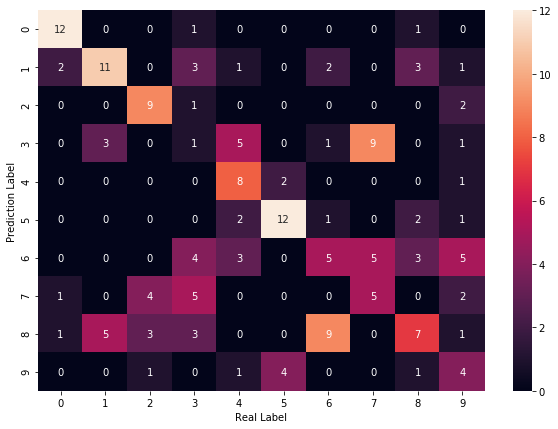

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[5] real:5
#1 min_error:1 index:[0 2 7 8] real:2
#2 min_error:0 index:[8] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[3] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[7] real:3
#8 min_error:1 index:[0 2 7 8] real:2
#9 min_error:1 index:[1 3 6] real:1
#10 min_error:0 index:[3] real:7
#11 min_error:1 index:[2 5 8 9] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:0 index:[7] real:3
#14 min_error:1 index:[1 3 6] real:1
#15 min_error:1 index:[0 2 7 8] real:3
#16 min_error:0 index:[9] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:1 index:[1 3 6] real:4
#22 min_error:0 index:[7] real:3
#23 min_error:1 index:[1 3 6] real:1
#24 min_error:1 index:[1 3 6] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[1] real:6
#29 min_e

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5343228200371057
Avg Base Learner:0.8297773654916512


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.15
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.3333333333333333


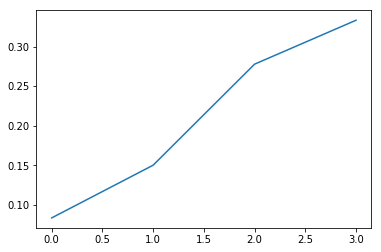

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.08333333333333333, 0.15, 0.2777777777777778, 0.3333333333333333]